In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(11990, 512, 512, 1)

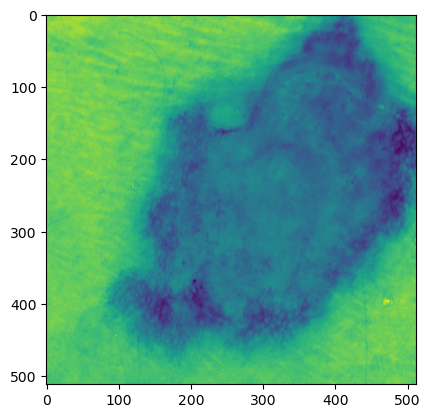

In [4]:
imshow(images[100])

In [5]:
masks.shape

(11990, 512, 512, 1)

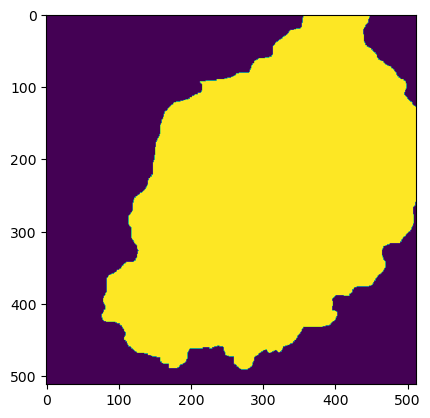

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [10]:
loss_fx = losses.BCE

In [11]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp13gi8le1kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpiiys1_ogkuc_unet2d


In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpiiys1_ogkuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.run(images, masks, runs=3, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_2_3_more.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
38/38 [==============================] - 38s 704ms/step - loss: 0.1309 - dice_coeff: 0.8697 - val_loss: 0.1185 - val_dice_coeff: 0.8686
Epoch 2/100
38/38 [==============================] - 19s 494ms/step - loss: 0.1087 - dice_coeff: 0.8899 - val_loss: 0.1200 - val_dice_coeff: 0.8807
Epoch 3/100
38/38 [==============================] - 19s 496ms/step - loss: 0.0955 - dice_coeff: 0.9035 - val_loss: 0.1250 - val_dice_coeff: 0.8832
Epoch 4/100
38/38 [==============================] - 18s 488ms/step - loss: 0.0906 - dice_coeff: 0.9087 - val_loss: 0.1237 - val_dice_coeff: 0.8832
Epoch 5/100
38/38 [==============================] - 19s 499ms/step - loss: 0.0821 - dice_coeff: 0.9154 - val_loss: 0.1367 - val_dice_coeff: 0.8864
Epoch 6/100
38/38 [==============================] - 19s 496ms/step - loss: 0.0801 - dice_coeff: 0.9190 - val_loss: 0.1305 - val_dice_coeff: 0.8849
Epoch 7/100
38/38 [==============================] - 18s 492ms/step 

In [15]:
R.classifier_scores 

[[0.15027499198913574, 0.8940637111663818],
 [0.17865322530269623, 0.8996798992156982],
 [0.22646597027778625, 0.9061604142189026]]

In [16]:
R.discriminator_scores 

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

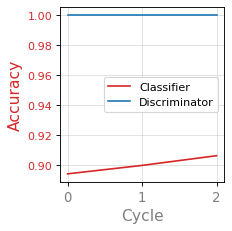

In [17]:
R.plot() 

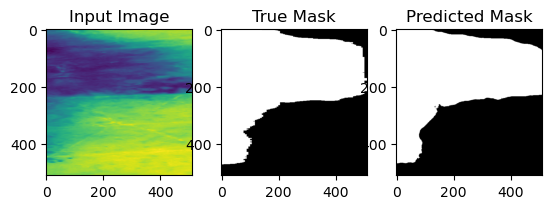

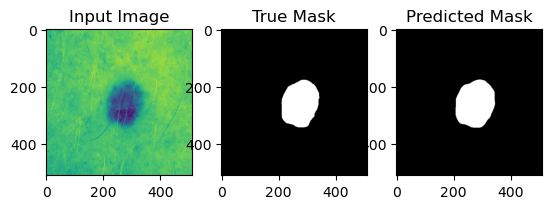

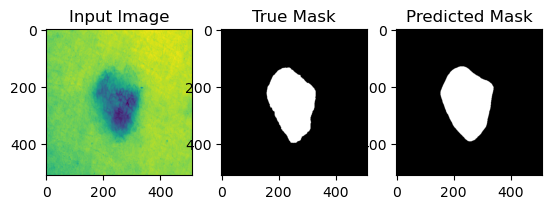

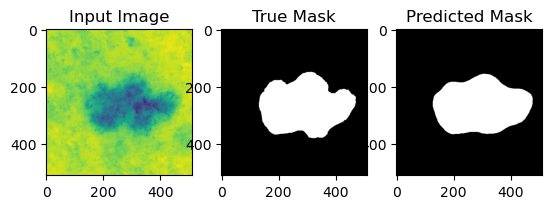

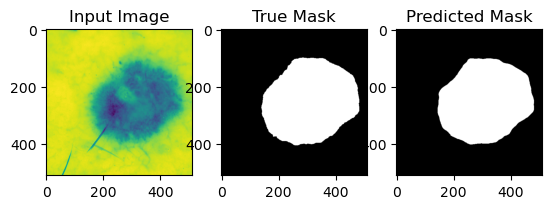

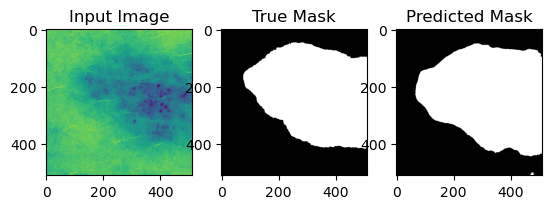

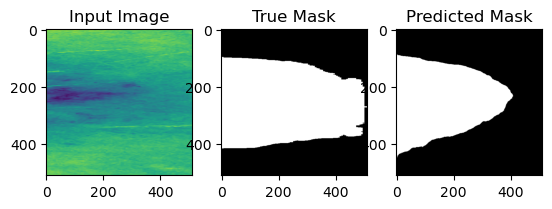

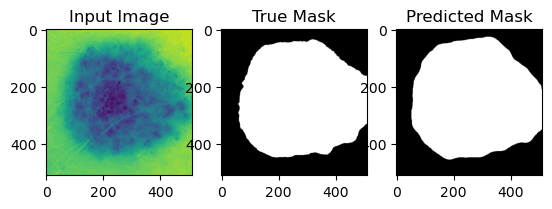

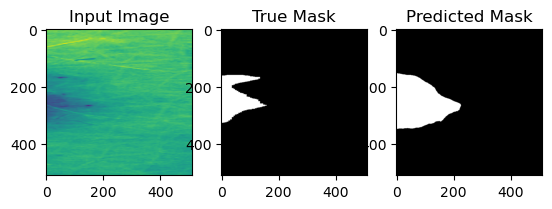

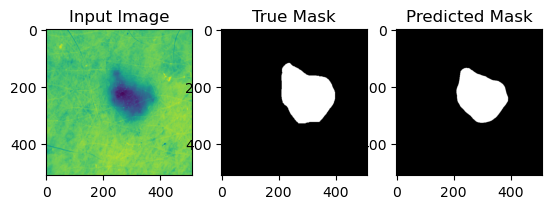

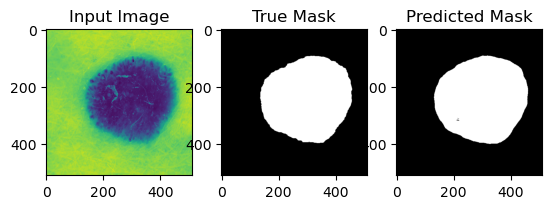

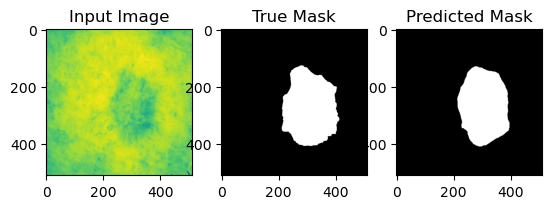

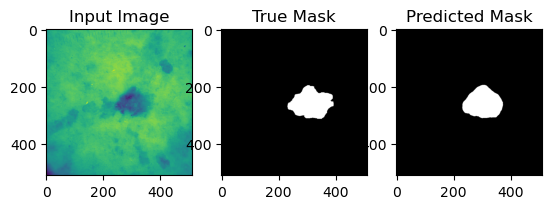

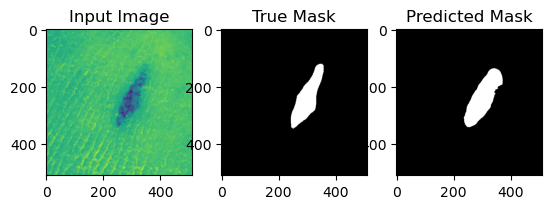

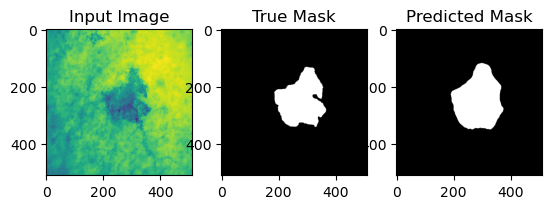

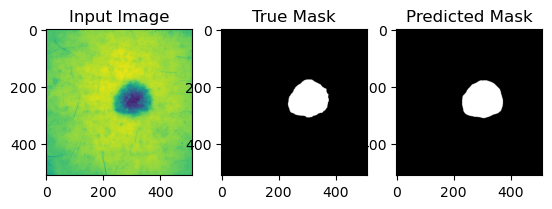

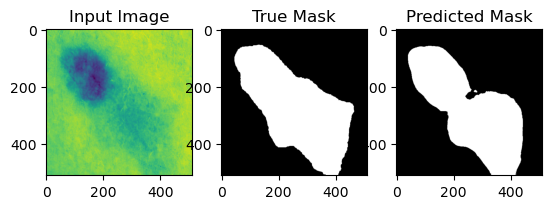

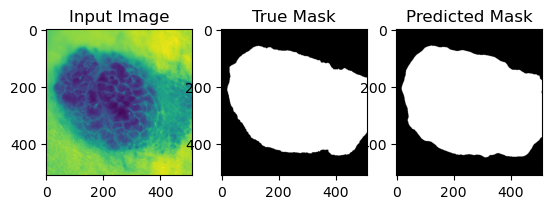

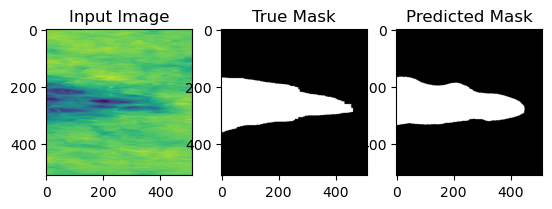

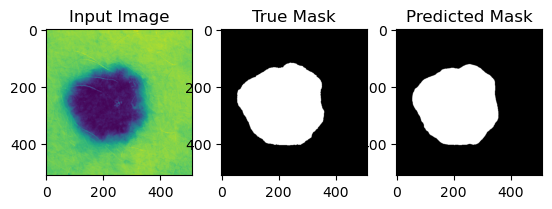

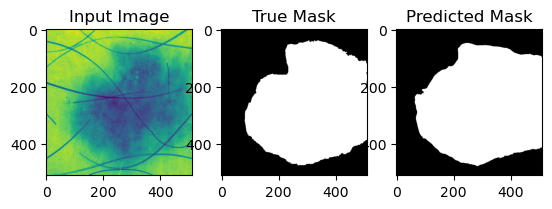

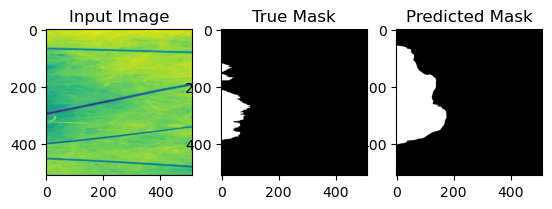

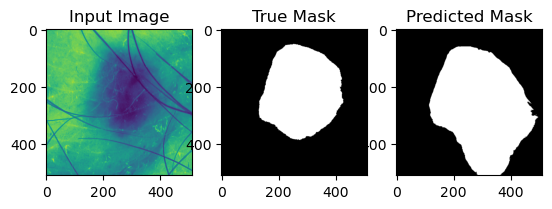

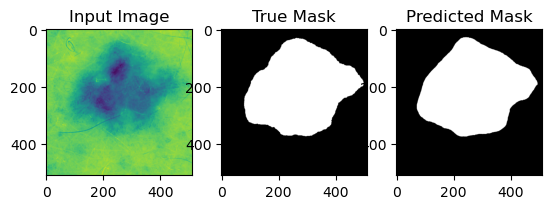

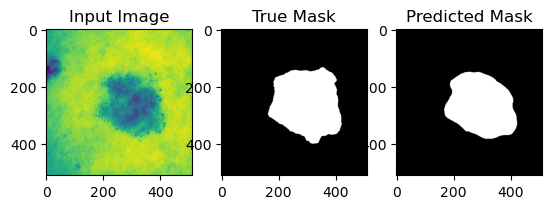

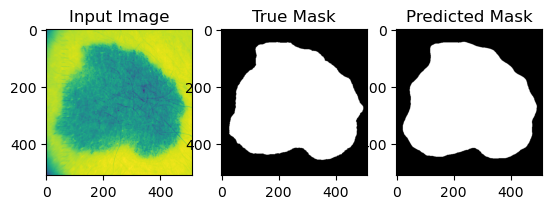

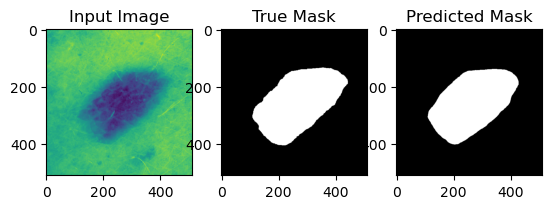

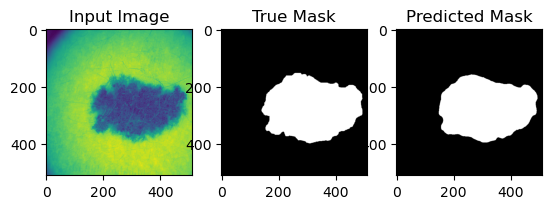

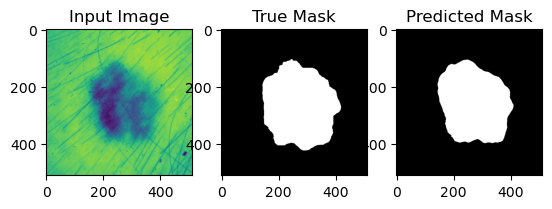

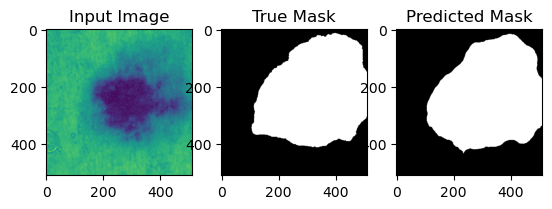

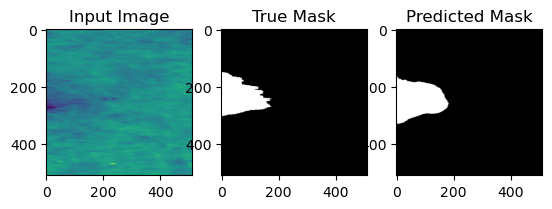

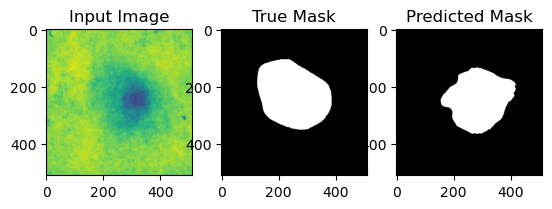

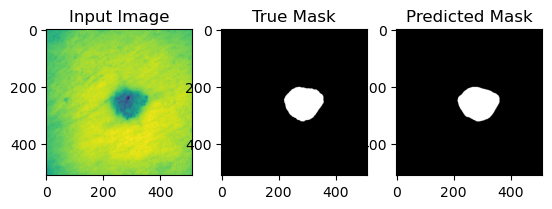

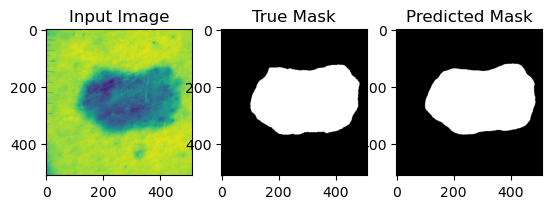

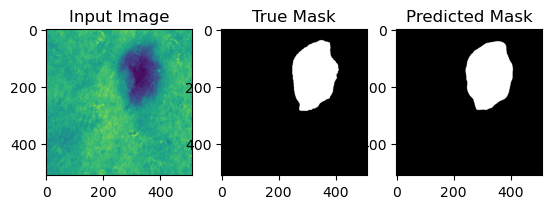

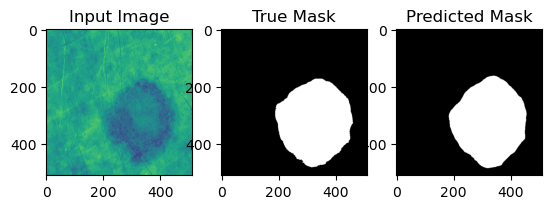

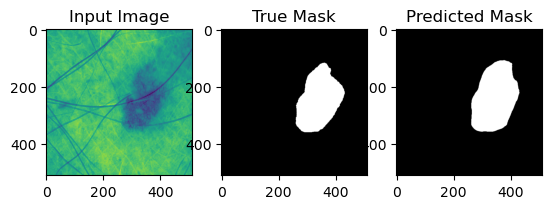

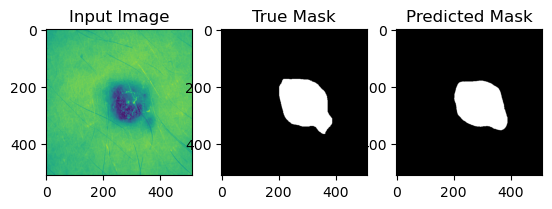

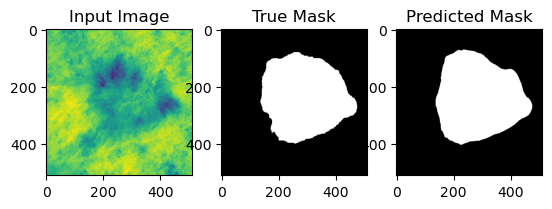

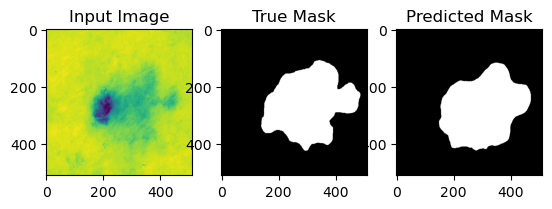

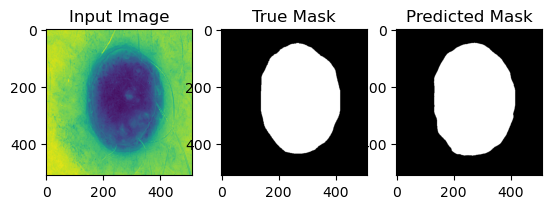

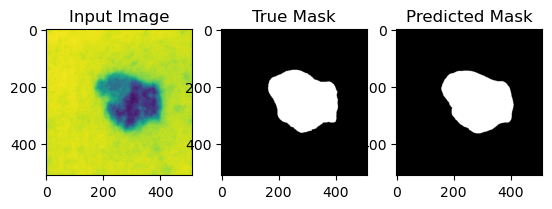

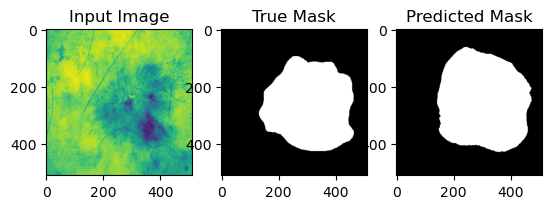

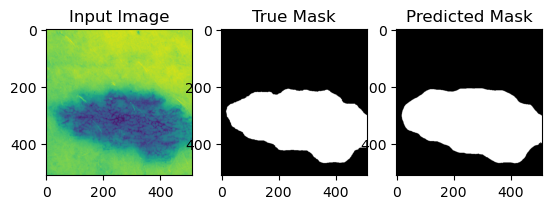

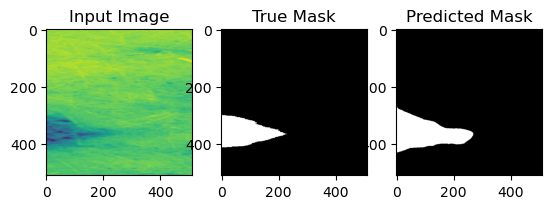

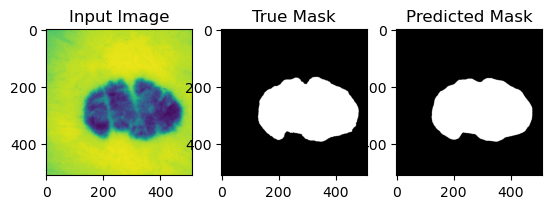

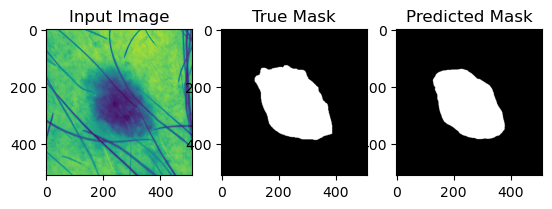

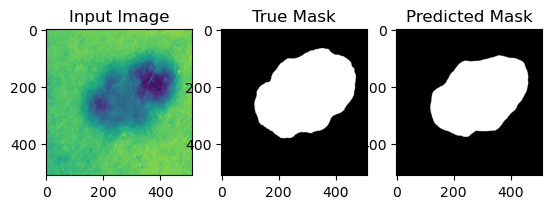

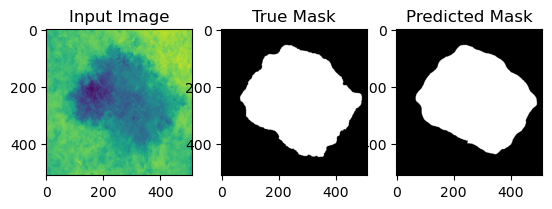

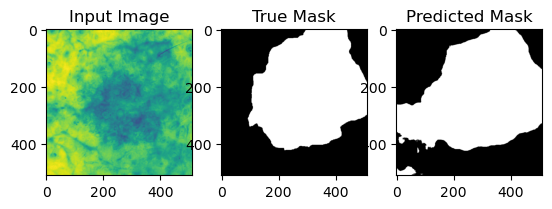

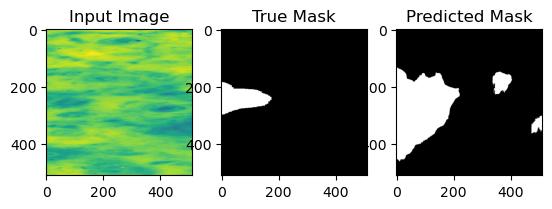

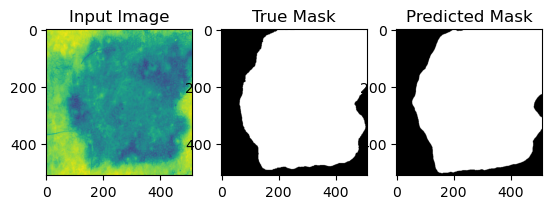

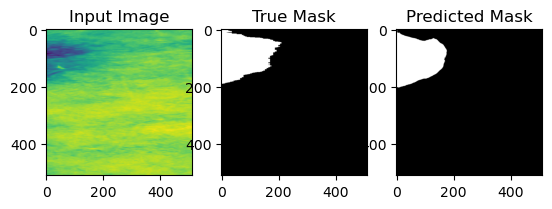

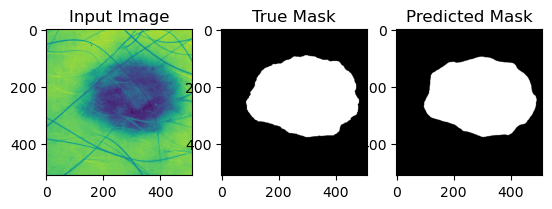

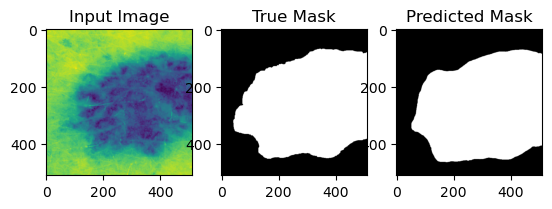

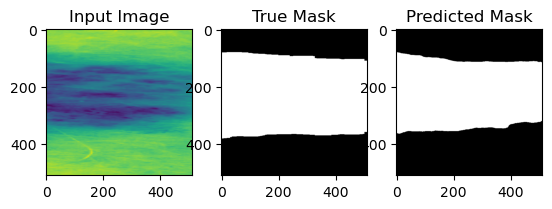

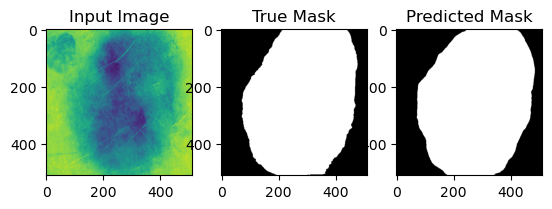

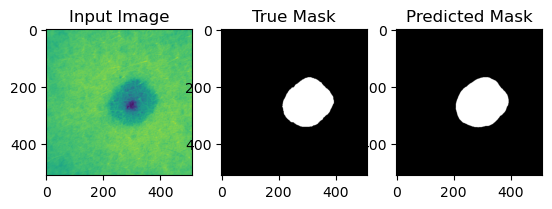

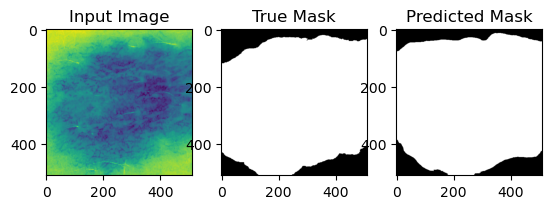

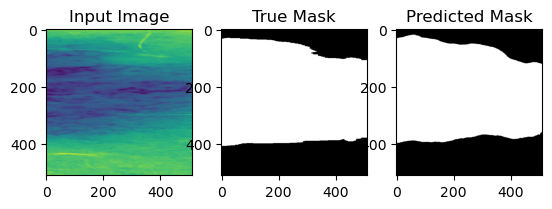

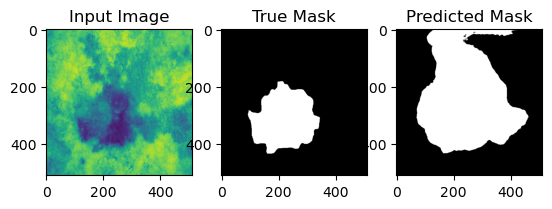

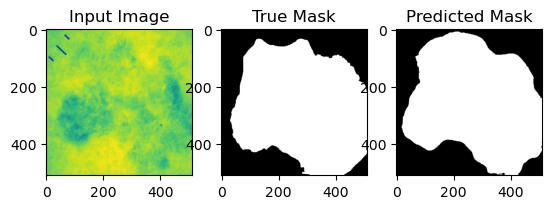

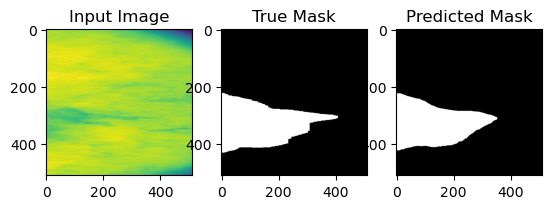

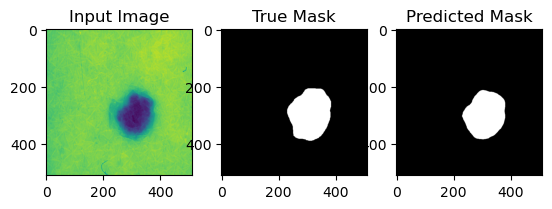

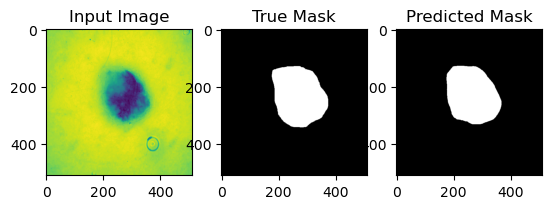

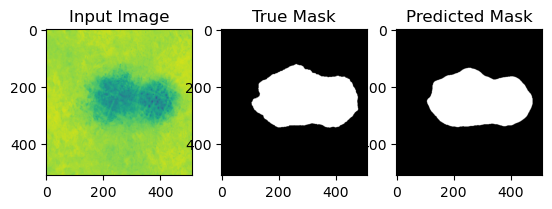

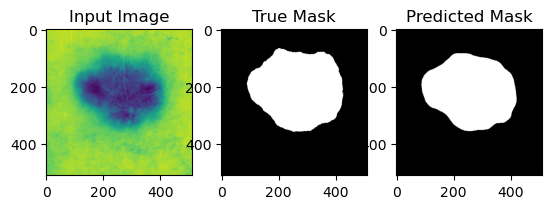

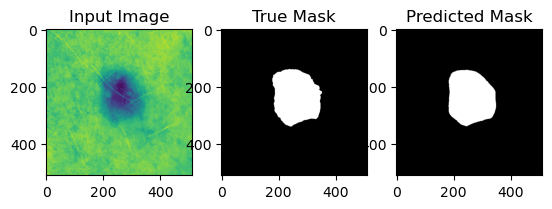

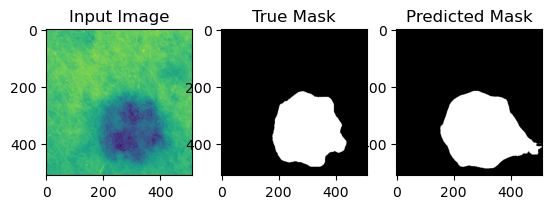

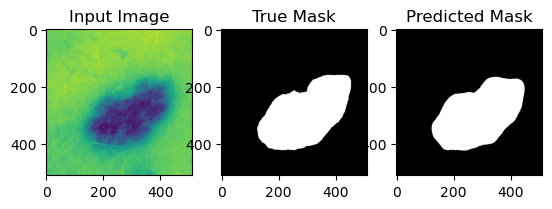

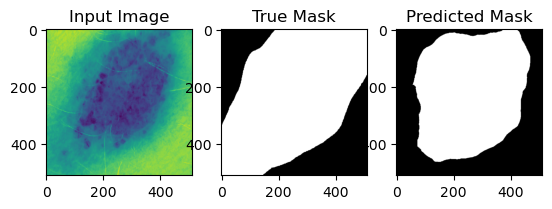

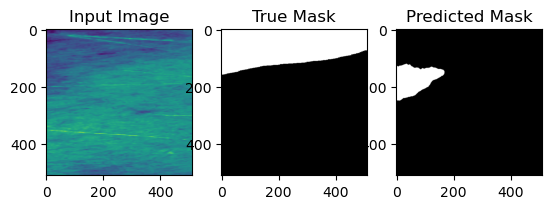

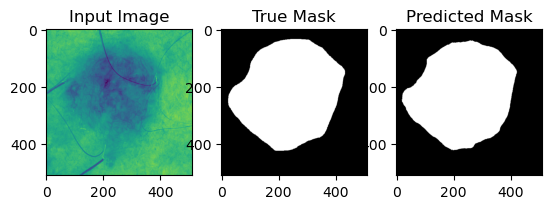

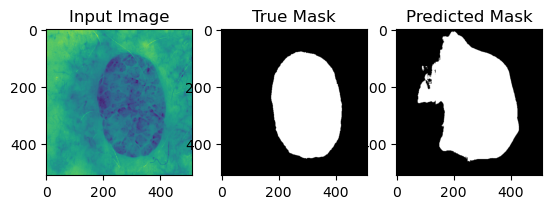

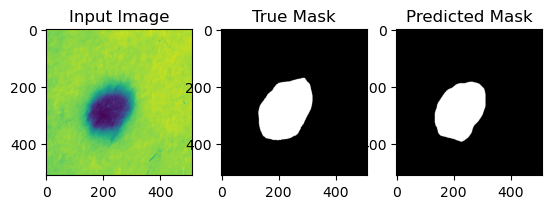

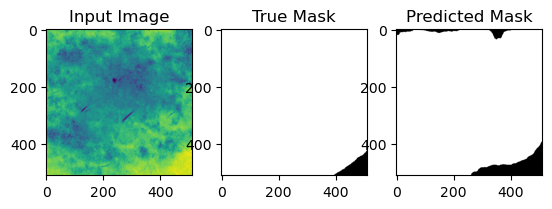

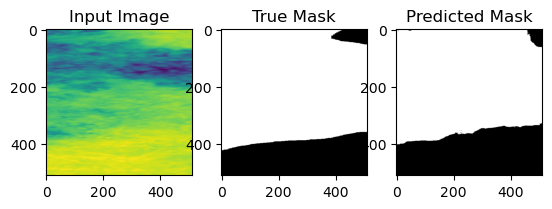

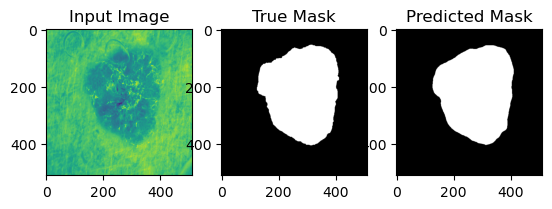

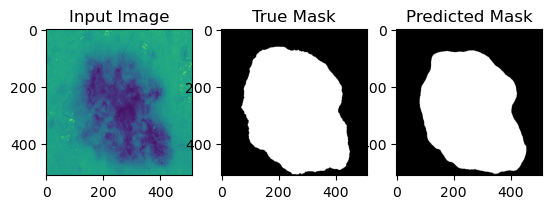

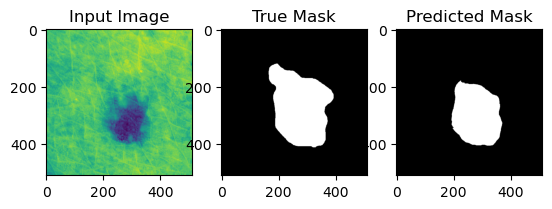

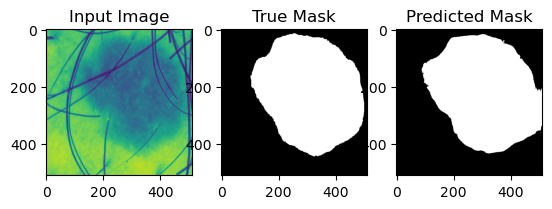

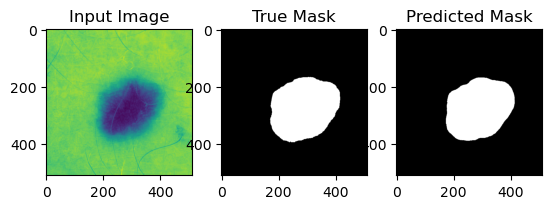

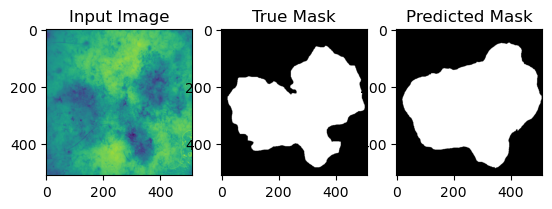

In [ ]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) 